In [1]:
pip install sentence-transformers scikit-learn


FIRST ATTEMPT WITH EXAMPLE DATA


In [10]:
import pandas as pd

topics=pd.read_pickle("../data/initial_topics_labels/intial_topics_labels.pk")['topics']

just_topics=[]
for topic in topics:
    for dict in topic:
        just_topics.append(dict['topic'])
just_topics=list(set(just_topics))
print(len(just_topics))

3221


In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np

# Initialize the model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate embeddings for each concept
embeddings = model.encode(just_topics)

print(embeddings[0].shape)

# Reduce dimensionality of embeddings for visualization
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


(384,)


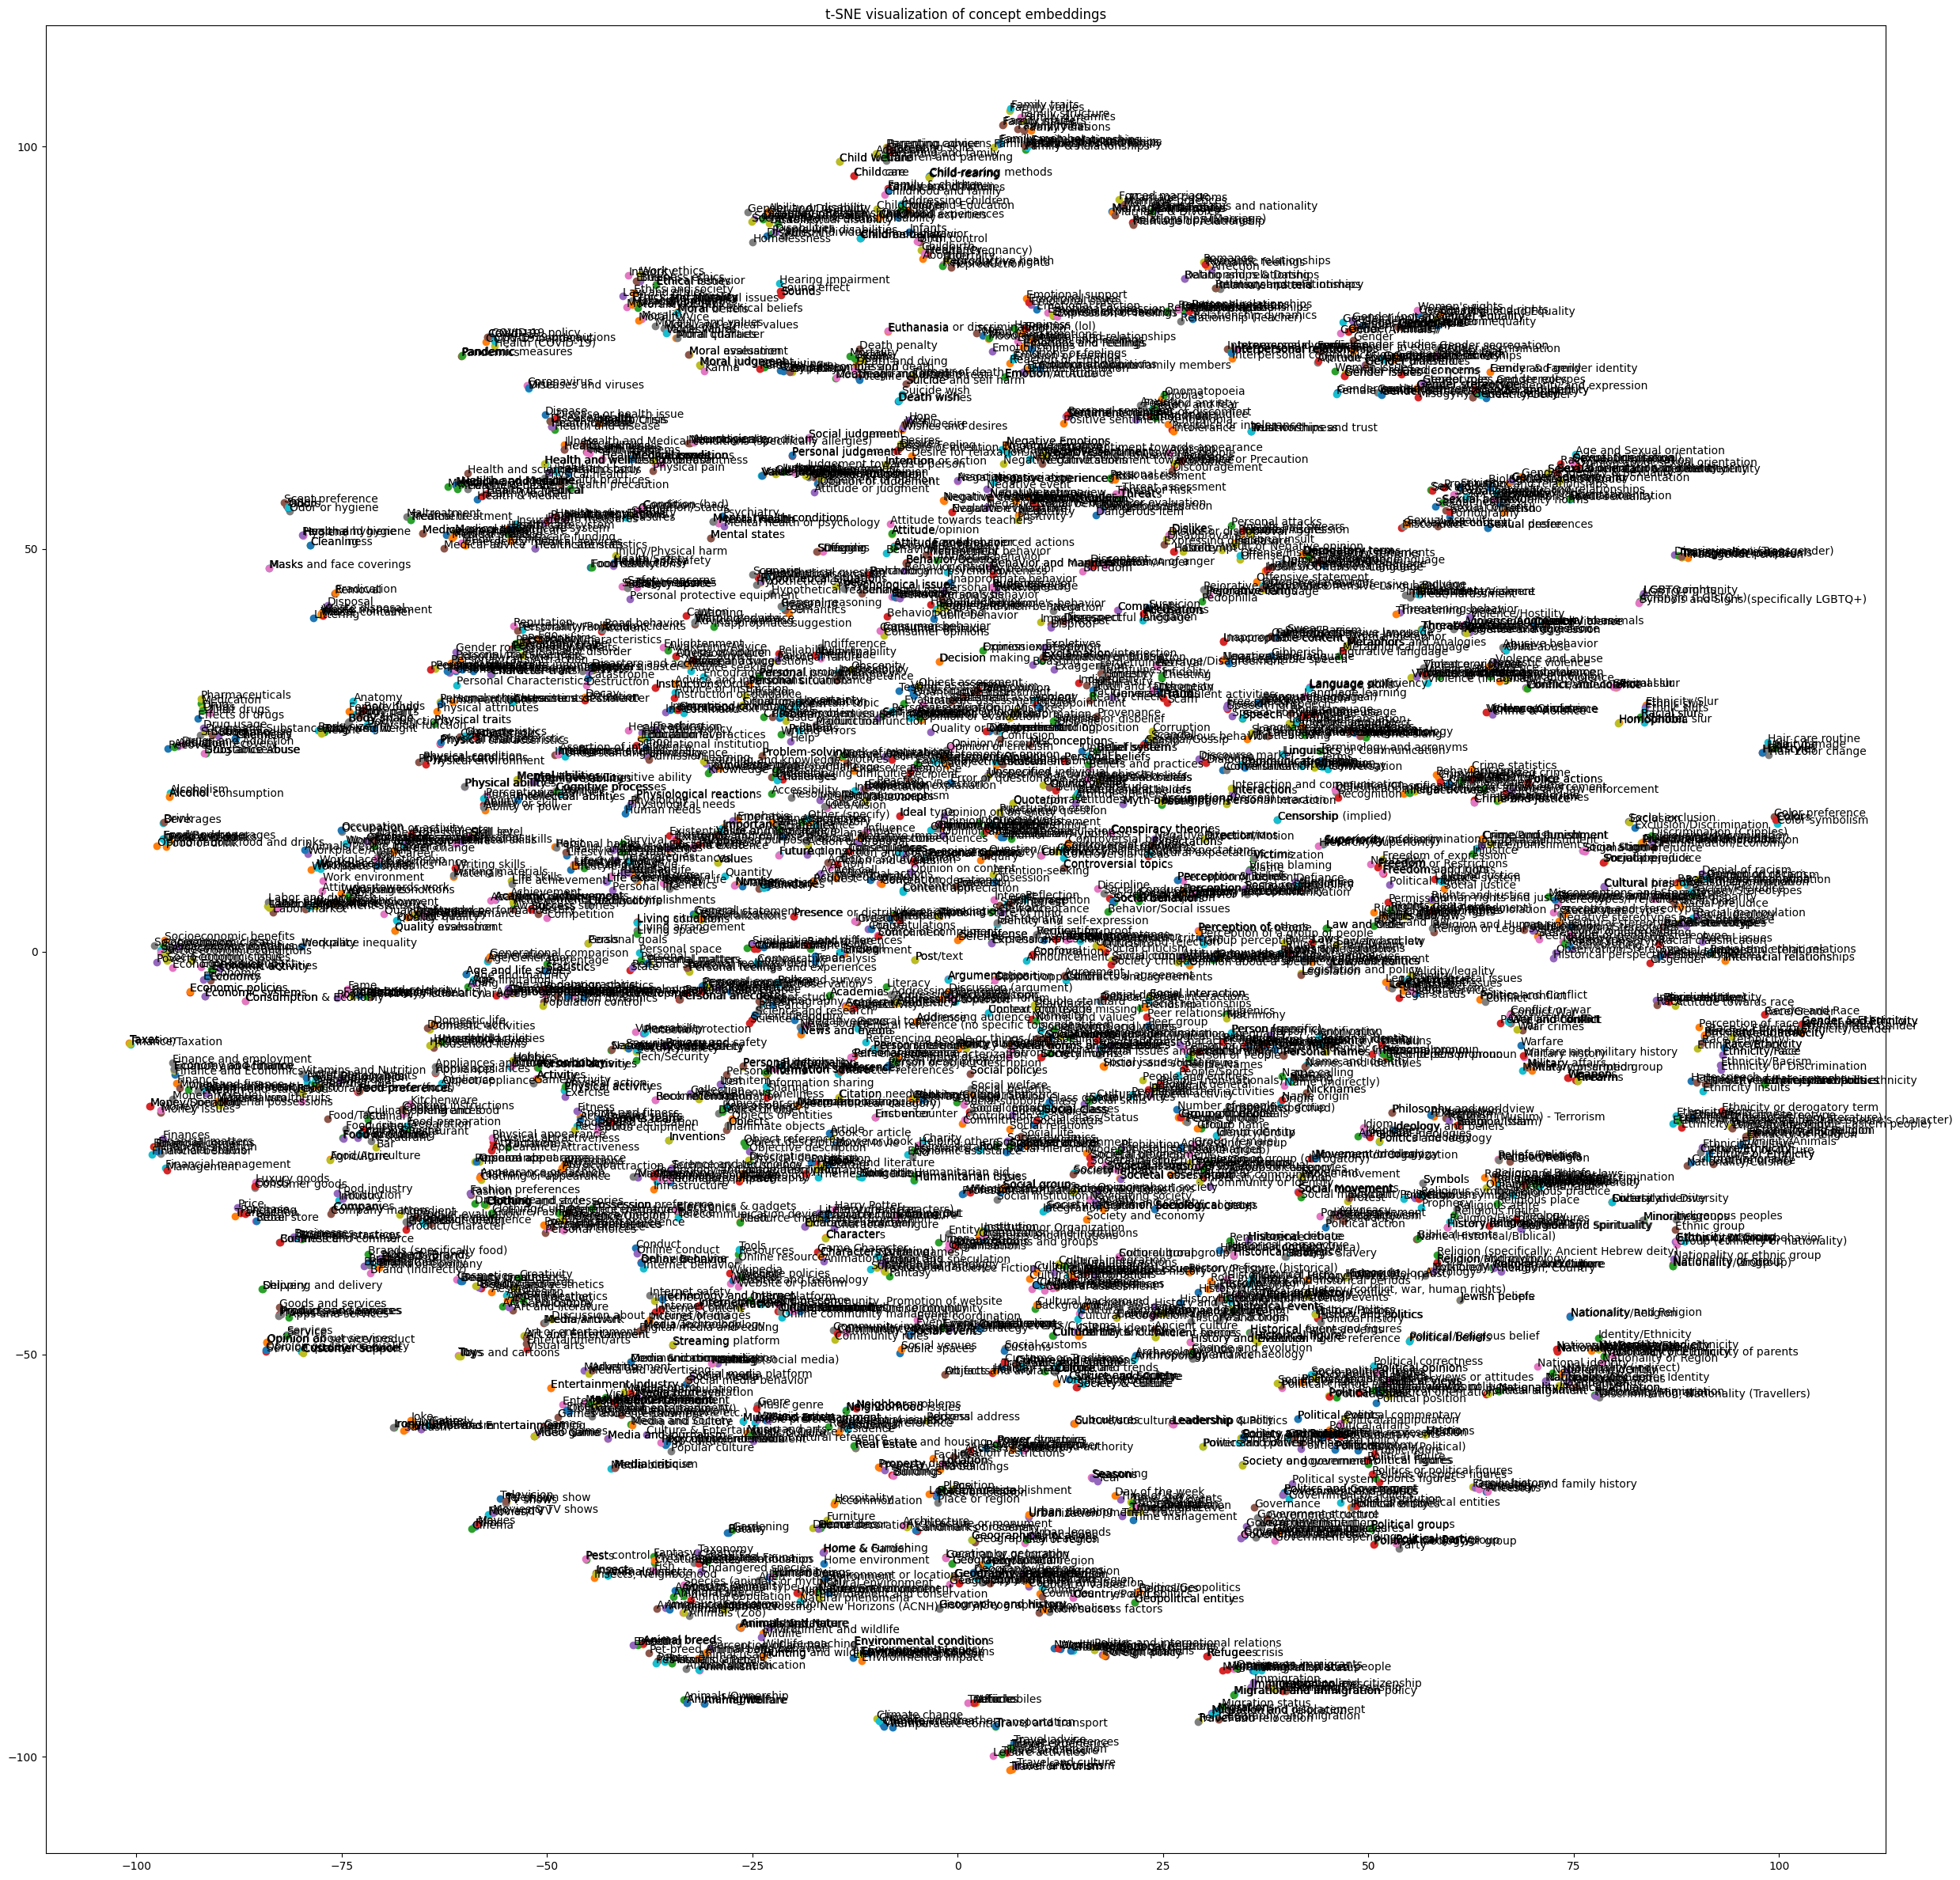

In [4]:
# Plot the 2D embeddings
plt.figure(figsize=(30, 30))
for i, label in enumerate(just_topics):
    x, y = embeddings_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, label, fontsize=10)
plt.title("t-SNE visualization of concept embeddings")
plt.show()

In [9]:
num_clusters = 50
# Perform clustering
clustering_model = KMeans(n_clusters=num_clusters, n_init='auto',random_state=42)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

# Aggregate similar concepts
clustered_concepts = {}
for i, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_concepts:
        clustered_concepts[cluster_id] = []
    clustered_concepts[cluster_id].append(just_topics[i])
for c,v in clustered_concepts.items():
  print(c,v)

13 ['', 'Structure', 'Idiom', 'Endearment', 'Statement assessment', 'Intelligence studies', 'Unclear (context is missing)', 'Moderation', 'Suggestion', 'Interpretation', 'Knowledge', 'Understanding', 'Classification', 'Task', 'Technical skills', 'Device or object', 'Argumentation', 'Reaction', 'Aspects', 'Instructions/Orders', 'Obstacles', 'Statement', 'Observation', 'Other (specify)', 'Analysis', 'Assertion of intelligence', 'Affirmation', 'Quantitative assessment', 'Cognitive process', 'Value judgement', 'Advantages', 'Information manipulation', 'Quality/performance', 'Reference', 'Conduct', 'Inanimate objects', 'Generalizations', 'Explanation', 'Reflection', 'Symbols', 'Self evaluation', 'Assumption', 'Data manipulation', 'Object assessment', 'Chemistry', 'Semantics', 'Speed', 'Logic', 'Addressing', 'Right', 'Frequency', 'Terms', 'Argument', 'Value assessment', 'Numbers', 'Preparation', 'Class', 'Influence', 'Value judgments', 'Context and usage', 'Generalization', 'Skill set', 'Kno

In [14]:
import ast
file = open('../data/concepts.txt', 'r')

clustered_concepts = []
for line in file:
  start = line.find('[')
  end = line.find(']')
  if start != -1 and end != -1:
      clustered_concepts.append(ast.literal_eval(line[start:end+1]))

print(clustered_concepts)

[['', 'Time', 'Time travel', 'Seasons', 'Seasoning', 'Astrology', 'Community events', 'Condition/Status', 'Time frame', 'Invitation', 'Time of day', 'Season', 'Competition', 'Time perspective', 'Audience', 'News and events', 'Awards', 'Victory', 'Forecast', 'Greeting', 'Coming Out', 'Duration', 'Coming out', 'Status', 'Sport', 'Time management', 'Fame', 'News source', 'Farewell', 'News', 'Prediction', 'Confirmation', 'Time duration', 'Current events', 'Time period', 'Frequency', 'Addressing audience', 'Resolutions', 'Success stories', 'Year', 'Sports team', 'Event coordination', 'Ending', 'Sports figures', 'Sports', 'Fantasy', 'Athletics', 'Background', 'Future plans', 'Time and events', 'Day of the week', 'State', 'Song title', 'Wish', 'Sports teams', 'Event', 'Announcement', 'Praise', 'Admission', 'Congratulations', 'Time and date', 'Holiday', 'Success', 'Performance', 'Future', 'Title', 'Hope', 'Race', 'Celebration', 'Event or celebration', 'Goals'], ['Dangerous item', 'Artifacts', 

In [15]:
# Select one representative concept from each cluster (e.g., the first one)
#aggregated_concepts = [cluster[1] for cluster in clustered_concepts.values()]
aggregated_concepts = [
    'Time & Events', 'Threat or Risk', 'Social setting/impact', 'Food and drink', 'Insult', 'Abstraction',
    'Information and knowledge', 'Health Medicine', 'Negative sentiments', 'Death', 'Fitness and Skills', 'Migration',
    'Animals', 'Internet and media', 'Race or ethnicity', 'Aggression and Violence', 'Identity',
    'Behavior & Attitude', 'Racial stereotypes', 'Jobs & Institutions', 'Culture',
    'Finance and wealth', 'Children', 'Personal tastes & Art', 'Relationships',
    'Addictions/Drugs', 'History', 'Claim/Opinion', 'Safety', 'Moral issues',
    'Crime', 'Gender', 'Personal traits/taste', 'Locations/Geography', 'Politics', 'Groups/Names',
    'Society & Culture', 'Emotions', 'Law and regulation', 'Language and communication', 'Brand/Product',
    'Life', 'Environment', 'Geopolitics/National Issue', 'War', 'Family', 'Technology/equipment',
    'Sexuality', 'Media/entertainment', 'Religion'
]

print(len(aggregated_concepts))
print(aggregated_concepts)

50
['Time & Events', 'Threat or Risk', 'Social setting/impact', 'Food and drink', 'Insult', 'Abstraction', 'Information and knowledge', 'Health Medicine', 'Negative sentiments', 'Death', 'Fitness and Skills', 'Migration', 'Animals', 'Internet and media', 'Race or ethnicity', 'Aggression and Violence', 'Identity', 'Behavior & Attitude', 'Racial stereotypes', 'Jobs & Institutions', 'Culture', 'Finance and wealth', 'Children', 'Personal tastes & Art', 'Relationships', 'Addictions/Drugs', 'History', 'Claim/Opinion', 'Safety', 'Moral issues', 'Crime', 'Gender', 'Personal traits/taste', 'Locations/Geography', 'Politics', 'Groups/Names', 'Society & Culture', 'Emotions', 'Law and regulation', 'Language and communication', 'Brand/Product', 'Life', 'Environment', 'Geopolitics/National Issue', 'War', 'Family', 'Technology/equipment', 'Sexuality', 'Media/entertainment', 'Religion']


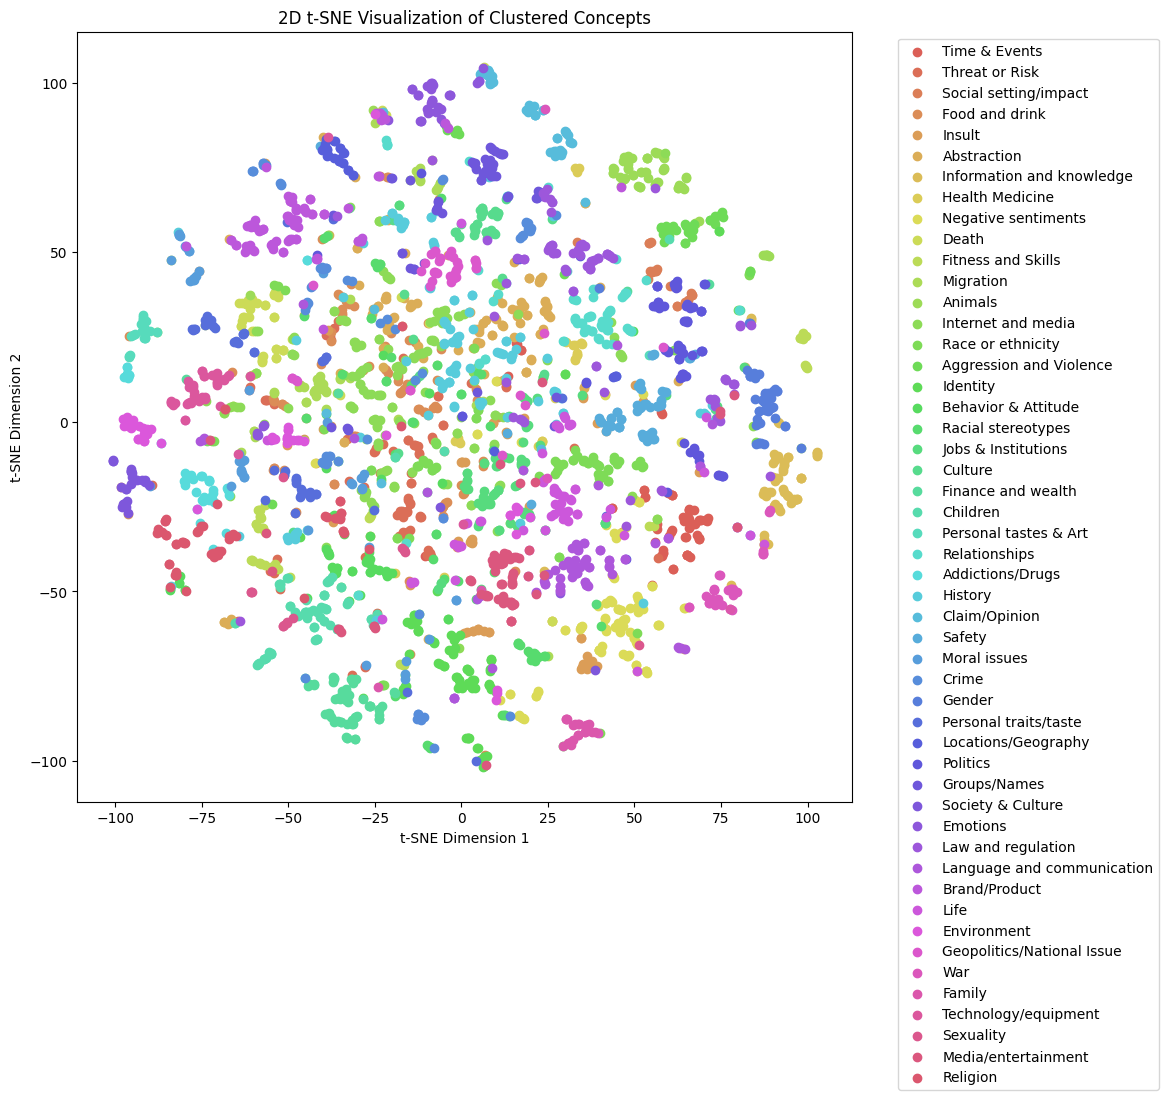

In [16]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

COLORS = {
    i : x for i, x in enumerate(sns.color_palette("hls", num_clusters+1).as_hex())
}

plt.figure(figsize=(10, 10))
for cluster_id in range(num_clusters):
    # Get the points that belong to the current cluster
    cluster_points = embeddings_2d[cluster_assignment == cluster_id]

    # Plot the points
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=COLORS[cluster_id],label=aggregated_concepts[cluster_id])


# Add legend
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))

# Add titles and labels
plt.title('2D t-SNE Visualization of Clustered Concepts')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Show plot
plt.show()


In [45]:
import pickle

def find_element_index(data, element):
    for i, inner_list in enumerate(data):
        if element in inner_list:
            return i
    return -1

with open('../data/initial_topics_labels/intial_topics_labels.pk', 'rb') as f:
    # Load the data from the file
    data = pickle.load(f)

data_broad_topic_list = []

for index, sentence in data.iterrows():
    sentence_new = sentence.to_dict()
    topics = sentence['topics']

    agg_topics=[]
    for t in topics:
        index = find_element_index(clustered_concepts, t['topic'])
        agg_topics.append(aggregated_concepts[index])

    agg_topics = list(set(agg_topics)) #remove duplicates

    sentence_new['topics'] = agg_topics
    data_broad_topic_list.append(sentence_new)

data_broad_topic = pd.DataFrame(data_broad_topic_list)
print(data_broad_topic)


                                                    text  sentence_number  \
0      social services have a love/hate relationship ...                0   
1      Yes it's a joke and offensive isn't it? Why ar...                1   
2      I do not have passions in life, and I'm not su...                2   
3      You better be. That was the most half-assed co...                3   
4      Waging war on, and bombing, a foreign sovereig...                4   
...                                                  ...              ...   
12909  I am getting more knowledgable in Islam thanks...                2   
12910  go fuck yourself if you ride camels in dubai w...                3   
12911                           All foreigners are dirty                4   
12912  Seeing my dumb ass brothers learning to swim i...                0   
12913  My fucking wish is to have enough money to mak...                1   

                                           topics    label  
0          [He

In [49]:
data_broad_topic.to_csv('../data/broad_topic/broad_topic_df.csv', index=False)